For this assignment, you will be working with a modified version of weather data from London from Kaggle.

The assignment is split into 2 parts:

Part 1: Load the data and create a datetime index

Part 2: Answer 2 Questions using visualizations and the correct frequency data

**Part 1: Load the data and make a datetime index**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [18]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


You must first load the data and create a datetime index.

**One - Convert the date column to datetime dtype.**

In [20]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

**Two - Set the date column as the index**

In [21]:
df = df.set_index('date')

In [22]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [23]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

**Three - Filter out only the required data**

Keep only data from the year 2000 or later.

Keep only the following features:

precipitation

mean_temp

min_temp

max_temp

snow_depth

In [24]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


**Four - Impute any missing values**

In [25]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [26]:
df.isna().sum().sum()

3337

In [27]:
dict = {'precipitation': 'sum', 'mean_temp': 'mean'}

In [29]:
quesone_month = df.copy()
quesone_month = df.resample('M').agg(dict['precipitation'])
quesone_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.30,159.50,78.30,236.60,0.00
2000-02-29,62.20,200.90,110.00,288.00,0.00
2000-03-31,13.40,254.60,147.00,366.20,0.00
2000-04-30,71.80,256.10,149.90,373.50,0.00
2000-05-31,68.40,402.40,278.90,520.20,0.00
...,...,...,...,...,...
2020-08-31,45.20,578.10,463.80,712.60,0.00
2020-09-30,19.20,479.60,334.80,625.60,0.00
2020-10-31,143.40,331.50,257.90,418.30,0.00


In [30]:
quesone_year = df.copy()
quesone_year = df.resample('A').agg(dict['mean_temp'])
quesone_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,2.11,11.53,7.97,15.11,0.01
2001-12-31,1.95,11.31,7.64,14.97,0.00
2002-12-31,2.15,12.01,8.35,15.73,0.00
2003-12-31,1.31,12.23,7.99,16.49,0.03
2004-12-31,1.71,11.87,8.21,15.51,0.01
2005-12-31,1.22,11.88,8.03,15.73,0.01
2006-12-31,1.74,12.39,8.52,16.17,0.00
2007-12-31,1.88,12.06,8.22,15.94,0.03
2008-12-31,1.76,11.17,7.45,15.03,0.02


In [31]:
quesone_month.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [32]:
quesone_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       1
dtype: int64

In [33]:
quesone_year = quesone_year.interpolate()
quesone_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

**Part 2: Answer the Questions with Visualizations**

Using the Correct Frequency

**Q1: What month had the most precipitation between 2000 through 2010?**

    -Resample the data as Monthly frequency.
    -Find the date and corresponding value for the max precipitation.
    -Plot the feature and time period that corresponds to the question.
    -Make sure to meet the "Visualization Requirements" below!
    -Determine the date and value for the most precipitation (the max precipitation).
    -Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    -Make sure to add a legend so that your label is visible.

In [34]:
quesone_month = quesone_month.loc['2000':'2010']
quesone_month.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

In [35]:
quesone_month.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.30,159.50,78.30,236.60,0.00
2000-02-29,62.20,200.90,110.00,288.00,0.00
2000-03-31,13.40,254.60,147.00,366.20,0.00
2000-04-30,71.80,256.10,149.90,373.50,0.00
2000-05-31,68.40,402.40,278.90,520.20,0.00


In [15]:
quesone.loc[quesone['precipitation'].idxmax()]

precipitation   36.60
mean_temp       10.60
min_temp         7.80
max_temp        11.30
snow_depth       0.00
Name: 2000-10-29 00:00:00, dtype: float64

In [36]:
quesone_month.loc[quesone_month['precipitation'].idxmax()]

precipitation   138.40
mean_temp       288.10
min_temp        214.10
max_temp        356.10
snow_depth        0.00
Name: 2009-11-30 00:00:00, dtype: float64

In [37]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = quesone_month.loc[quesone_month['precipitation'].idxmax()]

In [38]:
precip = quesone_month.loc[quesone_month['precipitation'].idxmax()].name.date()
print(precip)

2009-11-30


In [39]:
print(f'The date of highest precipitation is: {precip}')
print(f'Precipitation on that day is: {precipitation}')

The date of highest precipitation is: 2009-11-30
Precipitation on that day is: 138.4


In [40]:
ts_precip = quesone_month['precipitation']
ts_precip

date
2000-01-31   14.30
2000-02-29   62.20
2000-03-31   13.40
2000-04-30   71.80
2000-05-31   68.40
              ... 
2010-08-31   83.80
2010-09-30   38.00
2010-10-31   61.00
2010-11-30   22.00
2010-12-31   21.20
Freq: M, Name: precipitation, Length: 132, dtype: float64

November 11th, 2009 had the most precipitation between 2000 through 2010.

The precipitation was 138.40 inches total.

**Plot**

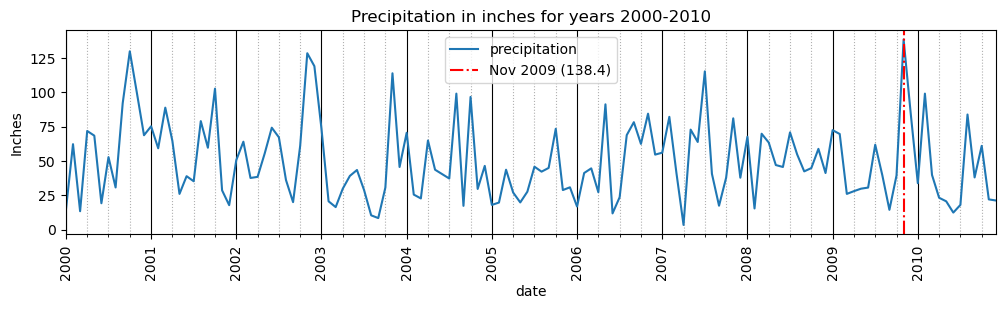

In [46]:
fig, ax = plt.subplots(figsize=(12,3))
ts_precip.plot(ax = ax, title='Precipitation in inches for years 2000-2010', ylabel='Inches')
## Making major & minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(precip, color = 'red', ls ="-.", label=f'Nov 2009 ({ts_precip.max()})')
ax.legend();

**Q2: Which year between 2000-2020 had the coolest average temperature?**

    -Resample the data as Yearly frequency.
    -Plot the feature and time period that corresponds to the question.
    -Make sure to meet the "Visualization Requirements" below!
    -Determine the date and value for the lowest mean temp.
    -Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


In [47]:
quesone_year.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [48]:
quesone_year.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,2.11,11.53,7.97,15.11,0.01
2001-12-31,1.95,11.31,7.64,14.97,0.00
2002-12-31,2.15,12.01,8.35,15.73,0.00
2003-12-31,1.31,12.23,7.99,16.49,0.03
2004-12-31,1.71,11.87,8.21,15.51,0.01


In [49]:
quesone_year.loc[quesone_year['mean_temp'].idxmin()]

precipitation    1.38
mean_temp       10.65
min_temp         6.76
max_temp        14.49
snow_depth       0.29
Name: 2010-12-31 00:00:00, dtype: float64

In [51]:
precipitation2, mean_temp2, min_temp2, max_temp2, snow_depth2 = quesone_year.loc[quesone_year['mean_temp'].idxmin()].round()

In [52]:
date = quesone_year.loc[quesone_year['mean_temp'].idxmin()].name.date()
print(date)

2010-12-31


In [53]:
print(f'The date of lowest temperature is: {date}')
print(f'That temperature on that date was: {mean_temp2}')

The date of lowest temperature is: 2010-12-31
That temperature on that date was: 11.0


In [54]:
ts_temp = quesone_year['mean_temp'].round(2)
ts_temp

date
2000-12-31   11.53
2001-12-31   11.31
2002-12-31   12.01
2003-12-31   12.23
2004-12-31   11.87
2005-12-31   11.88
2006-12-31   12.39
2007-12-31   12.06
2008-12-31   11.17
2009-12-31   11.72
2010-12-31   10.65
2011-12-31   12.47
2012-12-31   11.32
2013-12-31   11.20
2014-12-31   12.61
2015-12-31   12.09
2016-12-31   11.89
2017-12-31   12.24
2018-12-31   12.44
2019-12-31   12.23
2020-12-31   12.72
Freq: A-DEC, Name: mean_temp, dtype: float64

December 11st, 2010 had the lowest temperature between 2000 and 2020.

The temperature was 11 degrees that day. Hopefully this is in Celcius.

**Plot**

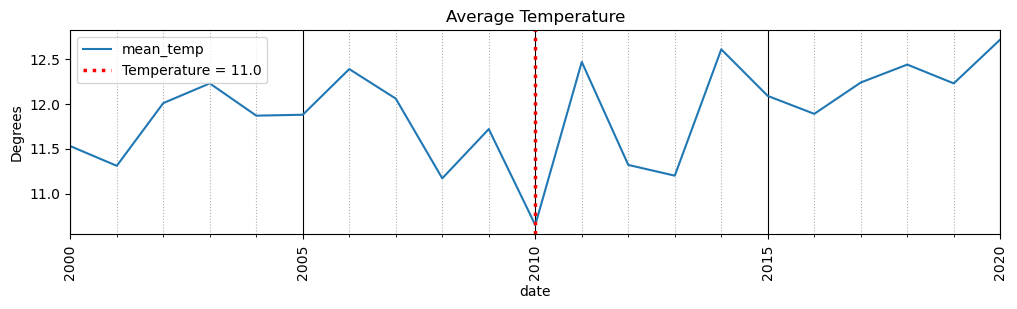

In [58]:
# create wide figure, ax = plt.subplots for 4 digit year labels
fig, ax = plt.subplots(figsize=(12,3))
# title as Average temperature with y label set to Degrees
ts_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
# major ticks every 5 years with 4 digit labels
ax.grid(which='major',axis='x',color='k')
# minor axix every 1 year
ax.grid(which='minor',axis='x',ls=":")
ax.axvline(date, color='red',lw=2.5, ls=':', label=f'Temperature = {mean_temp2}')
# rotate tick labels 90 degrees
fig.autofmt_xdate(rotation=90, ha='center')
ax.legend();